# Simple RNN

We create a simple RNN here - trying to predict a known sequence. <br>
<i>This is from Udacity's RNN exercise</i>

In [2]:
import torch
from torch import nn

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Show the Sequence

Create and plot the sequence we want to predict using RNN

In [4]:
plt.figure(figsize = (8,5))

seq_length = 20

time_steps = np.linspace(0, np.pi, seq_length + 1)
data = np.sin(time_steps)
data

array([0.00000000e+00, 1.56434465e-01, 3.09016994e-01, 4.53990500e-01,
       5.87785252e-01, 7.07106781e-01, 8.09016994e-01, 8.91006524e-01,
       9.51056516e-01, 9.87688341e-01, 1.00000000e+00, 9.87688341e-01,
       9.51056516e-01, 8.91006524e-01, 8.09016994e-01, 7.07106781e-01,
       5.87785252e-01, 4.53990500e-01, 3.09016994e-01, 1.56434465e-01,
       1.22464680e-16])

<Figure size 576x360 with 0 Axes>

In [6]:
data.shape

(21,)

In [8]:
data = data.reshape(data.shape[0], 1)
data.shape

(21, 1)

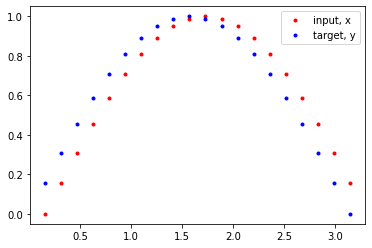

In [11]:
x = data[:-1]
y = data[1:]

# display the data
plt.plot(time_steps[1:], x, 'r.', label='input, x') # x
plt.plot(time_steps[1:], y, 'b.', label='target, y') # y

plt.legend(loc='best')
plt.show()

In [15]:
print(time_steps)

print(time_steps.shape)

[0.         0.15707963 0.31415927 0.4712389  0.62831853 0.78539816
 0.9424778  1.09955743 1.25663706 1.41371669 1.57079633 1.72787596
 1.88495559 2.04203522 2.19911486 2.35619449 2.51327412 2.67035376
 2.82743339 2.98451302 3.14159265]
(21,)


## Define RNN

Architecture: RNN followed by a fully connected neural network

input_size: size of input <br>
output_size: Size of output of the entire model, that is, output from the last fully connected layer <br>
hidden_dim: Size of the output from RNN part of the model <br>
n_layers: Number of layers in RNN part of the model <br>

In [ ]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(RNN, self).__init__()
        
        self.hidden_dim = hidden_dim
        
        self.rnn = nn.RNN(input_size=input_size, hidden_size = hidden_dim, num_layers=n_layers, 
                          batch_first= True)
        self.fc = nn.Linear(hidden_dim, output_size)
        
    def forward(self, x, hidden):
        """
        x is input of dimension (batch_size, sequence length, feature/input size)
        hidden is initial hidden state
        """
        batch_size = x.size(0)
        r_out, hidden = nn.rnn(x, hidden)
        r_out = r_out.view(-1, self.hidden_dim)
        output = self.fc(r_out)
        